# IMDB WW Movies & Genre Analysis - EDA Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#_____________________________________________
import requests
from bs4 import BeautifulSoup
#_________________________________
import re

# Note - Case Study Observations and conclusion in the bottom.(end ofthe eda)

## Web Scraping IMDB Top 50 Movies Category Wise

In [2]:
def movie_category(url_link):
    req = requests.get(url_link)
    page_view = BeautifulSoup(req.content)
#_______________________________________________________________________________________    
    movie_names = page_view.find_all('h3',class_='lister-item-header')
    names_list = []
    for i in range(0,len(movie_names)):
        a=re.sub('[()]','',movie_names[i].text).split()[1:-1]
        a= ' '.join(a)
        names_list.append(a)
#_________________________________________________________________________________________        
    year = page_view.find_all('span',class_='lister-item-year text-muted unbold')
    years =[]
    for i in range(0,len(year)):
        a= re.sub('[^0-9]','',year[i].text)
        years.append(a)     
#__________________________________________________________________________________________        
    star = page_view.find_all('div',class_='inline-block ratings-imdb-rating')
    stars = [p.text.strip() for p in star]
#__________________________________________________________________________________________    
    meta_score =[]
    meta = page_view.find_all('div',class_='ratings-bar') 
    for i in range(0,len(meta)):
        aa= meta[i].find_all('div',class_='inline-block ratings-metascore')
        if aa != []:
            aaa = aa[0].text.split()[0]
        elif aa == []: 
            aaa= 0
        meta_score.append(aaa)
#____________________________________________________________________________    
    vote = page_view.find_all('p',class_='sort-num_votes-visible')
    votings = []
    for i in range(0,len(vote)):
        a= vote[i].text.split()[1] 
        a= re.sub('[,]','',a)
        votings.append(a) 
    df = pd.DataFrame({'Year':years,'Movie Name':names_list,'Star Rating':stars,'Voting':votings,'Meta Score':meta_score})
    return df

In [3]:
Action = movie_category('https://www.imdb.com/search/title/?genres=action&languages=en&sort=user_rating,desc&title_type=feature&num_votes=10000,&explore=genres&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=d0addcab-e8f0-45ef-9965-515319b79038&pf_rd_r=BDDSVWZDF1Z525CTB07A&pf_rd_s=right-4&pf_rd_t=15051&pf_rd_i=genre&ref_=ft_gnr_mvtre_1')

Action['Genre'] = 'Action'

In [4]:
Comedy = movie_category('https://www.imdb.com/search/title/?genres=comedy&languages=en&sort=user_rating,desc&title_type=feature&num_votes=10000,&explore=genres&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=d0addcab-e8f0-45ef-9965-515319b79038&pf_rd_r=BDDSVWZDF1Z525CTB07A&pf_rd_s=right-4&pf_rd_t=15051&pf_rd_i=genre&ref_=ft_gnr_mvtre_5')

Comedy['Genre'] = 'Comedy'

In [5]:
Crime = movie_category('https://www.imdb.com/search/title/?genres=crime&languages=en&sort=user_rating,desc&title_type=feature&num_votes=10000,&explore=genres&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=d0addcab-e8f0-45ef-9965-515319b79038&pf_rd_r=BDDSVWZDF1Z525CTB07A&pf_rd_s=right-4&pf_rd_t=15051&pf_rd_i=genre&ref_=ft_gnr_mvtre_6')

Crime['Genre'] = 'Crime'

In [6]:
Drama = movie_category('https://www.imdb.com/search/title/?genres=drama&languages=en&sort=user_rating,desc&title_type=feature&num_votes=10000,&explore=genres&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=d0addcab-e8f0-45ef-9965-515319b79038&pf_rd_r=BDDSVWZDF1Z525CTB07A&pf_rd_s=right-4&pf_rd_t=15051&pf_rd_i=genre&ref_=ft_gnr_mvtre_8')

Drama['Genre'] = 'Drama'

In [7]:
Family = movie_category('https://www.imdb.com/search/title/?genres=family&languages=en&sort=user_rating,desc&title_type=feature&num_votes=10000,&explore=genres&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=d0addcab-e8f0-45ef-9965-515319b79038&pf_rd_r=BDDSVWZDF1Z525CTB07A&pf_rd_s=right-4&pf_rd_t=15051&pf_rd_i=genre&ref_=ft_gnr_mvtre_9')

Family['Genre'] = 'Family'

In [8]:
Fantasy = movie_category('https://www.imdb.com/search/title/?genres=fantasy&languages=en&sort=user_rating,desc&title_type=feature&num_votes=10000,&explore=genres&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=d0addcab-e8f0-45ef-9965-515319b79038&pf_rd_r=BDDSVWZDF1Z525CTB07A&pf_rd_s=right-4&pf_rd_t=15051&pf_rd_i=genre&ref_=ft_gnr_mvtre_10')

Fantasy['Genre'] = 'Fantasy'

In [9]:
Horror = movie_category('https://www.imdb.com/search/title/?genres=horror&languages=en&sort=user_rating,desc&title_type=feature&num_votes=10000,&explore=genres&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=d0addcab-e8f0-45ef-9965-515319b79038&pf_rd_r=BDDSVWZDF1Z525CTB07A&pf_rd_s=right-4&pf_rd_t=15051&pf_rd_i=genre&ref_=ft_gnr_mvtre_13')

Horror['Genre'] = 'Horror'

In [10]:
Romance = movie_category('https://www.imdb.com/search/title/?genres=romance&languages=en&sort=user_rating,desc&title_type=feature&num_votes=10000,&explore=genres&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=d0addcab-e8f0-45ef-9965-515319b79038&pf_rd_r=BDDSVWZDF1Z525CTB07A&pf_rd_s=right-4&pf_rd_t=15051&pf_rd_i=genre&ref_=ft_gnr_mvtre_17')

Romance['Genre'] = 'Romance'

In [11]:
Sci_fi = movie_category('https://www.imdb.com/search/title/?genres=sci-fi&languages=en&sort=user_rating,desc&title_type=feature&num_votes=10000,&explore=genres&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=d0addcab-e8f0-45ef-9965-515319b79038&pf_rd_r=BDDSVWZDF1Z525CTB07A&pf_rd_s=right-4&pf_rd_t=15051&pf_rd_i=genre&ref_=ft_gnr_mvtre_18')

Sci_fi['Genre'] = 'Sci_fi'

In [12]:
Advanture = movie_category('https://www.imdb.com/search/title/?genres=adventure&languages=en&sort=user_rating,desc&title_type=feature&num_votes=10000,&explore=genres&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=d0addcab-e8f0-45ef-9965-515319b79038&pf_rd_r=BDDSVWZDF1Z525CTB07A&pf_rd_s=right-4&pf_rd_t=15051&pf_rd_i=genre&ref_=ft_gnr_mvtre_2')

Advanture['Genre'] = 'Advanture'

In [13]:
Sport= movie_category('https://www.imdb.com/search/title/?genres=sport&languages=en&sort=user_rating,desc&title_type=feature&num_votes=10000,&explore=genres&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=d0addcab-e8f0-45ef-9965-515319b79038&pf_rd_r=BDDSVWZDF1Z525CTB07A&pf_rd_s=right-4&pf_rd_t=15051&pf_rd_i=genre&ref_=ft_gnr_mvtre_20')

Sport['Genre'] = 'Sport'

In [14]:
Western = movie_category('https://www.imdb.com/search/title/?genres=western&languages=en&sort=user_rating,desc&title_type=feature&num_votes=10000,&explore=genres&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=d0addcab-e8f0-45ef-9965-515319b79038&pf_rd_r=BDDSVWZDF1Z525CTB07A&pf_rd_s=right-4&pf_rd_t=15051&pf_rd_i=genre&ref_=ft_gnr_mvtre_24')

Western['Genre'] = 'Western'

In [15]:
df = pd.concat((Action,Advanture,Comedy,Crime,Drama,Family,Fantasy,Horror,Romance,Sci_fi,Western,Sport),axis=0,ignore_index=True)

## Data Preprocessing

In [16]:
df.head()

,Year,Movie Name,Star Rating,Voting,Meta Score,Genre
0,2008,The Dark Knight,9.0,2620229,84,Action
1,2003,The Lord of the Rings: The Return of the King,9.0,1824130,94,Action
2,2011,Kill Bill: The Whole Bloody Affair,8.8,11351,0,Action
3,2010,Inception,8.8,2322321,74,Action
4,2002,The Lord of the Rings: The Two Towers,8.8,1647113,87,Action


In [17]:
df[['Year','Movie Name']].duplicated().sum()

216

In [18]:
#df.drop_duplicates(['Year','Movie Name'],inplace=True,ignore_index=True)

In [19]:
df.isnull().sum()

Year           0
Movie Name     0
Star Rating    0
Voting         0
Meta Score     0
Genre          0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         600 non-null    object
 1   Movie Name   600 non-null    object
 2   Star Rating  600 non-null    object
 3   Voting       600 non-null    object
 4   Meta Score   600 non-null    object
 5   Genre        600 non-null    object
dtypes: object(6)
memory usage: 28.2+ KB


In [21]:
df['Meta Score'] = df['Meta Score'].astype(float)

In [22]:
df['Voting'] = df['Voting'].astype(int)

In [23]:
df['Star Rating'] =df['Star Rating'].astype(float)

In [24]:
df['Year'] = df['Year'].astype(int)

In [25]:
df.describe()

,Year,Star Rating,Voting,Meta Score
count,600.000000,600.000000,6.000000e+02,600.000000
mean,1990.266667,8.150833,5.598799e+05,68.803333
std,26.368435,0.359093,5.410125e+05,29.739571
min,1921.000000,7.300000,1.004800e+04,0.000000
25%,1975.000000,8.000000,8.551950e+04,65.000000
50%,1999.000000,8.100000,4.212170e+05,78.000000
75%,2011.000000,8.400000,8.587860e+05,88.000000
max,2022.000000,9.300000,2.648281e+06,100.000000


In [26]:
df[df['Meta Score']==0]

,Year,Movie Name,Star Rating,Voting,Meta Score,Genre
2,2011,Kill Bill: The Whole Bloody Affair,8.8,11351,0.0,Action
20,2016,Dangal,8.3,189789,0.0,Action
34,1926,The General,8.2,91466,0.0,Action
35,1924,Sherlock Jr.,8.2,50065,0.0,Action
46,1949,White Heat,8.1,33112,0.0,Action
...,...,...,...,...,...,...
563,1950,Night and the City,7.9,13992,0.0,Sport
574,1942,The Pride of the Yankees,7.6,11101,0.0,Sport
577,2021,83,7.5,37175,0.0,Sport
579,2009,Redline,7.5,14527,0.0,Sport


In [27]:
df['Meta Score'].replace(0.0,np.nan,inplace=True)

In [28]:
from datetime import date

In [29]:
df['Years Gap'] = date.today().year - df['Year']

In [30]:
#Example

df[df['Movie Name']=='The Dark Knight']

,Year,Movie Name,Star Rating,Voting,Meta Score,Genre,Years Gap
0,2008,The Dark Knight,9.0,2620229,84.0,Action,14
151,2008,The Dark Knight,9.0,2620229,84.0,Crime,14
202,2008,The Dark Knight,9.0,2620229,84.0,Drama,14


## Exploratory Analysis

> Univariance Analysis

In [31]:
Quantitative_data = df.select_dtypes(include=np.number).columns.tolist()

Year
skewnesss : -0.96



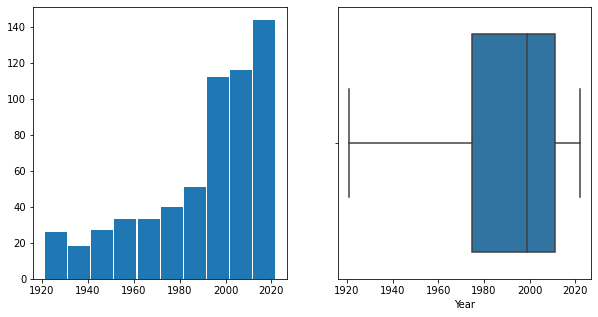

Star Rating
skewnesss : 0.1



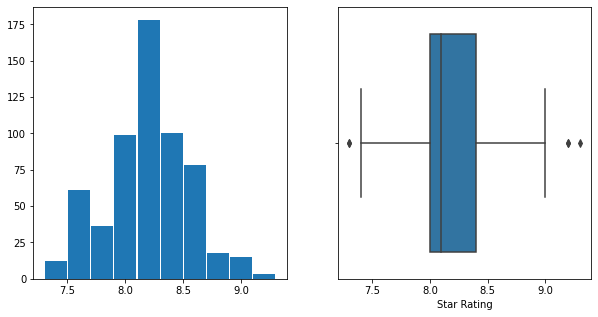

Voting
skewnesss : 1.16



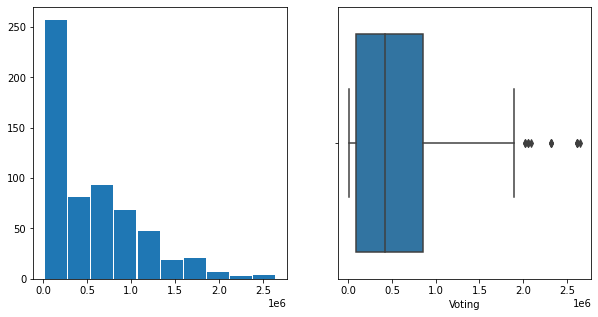

Meta Score
skewnesss : -0.58



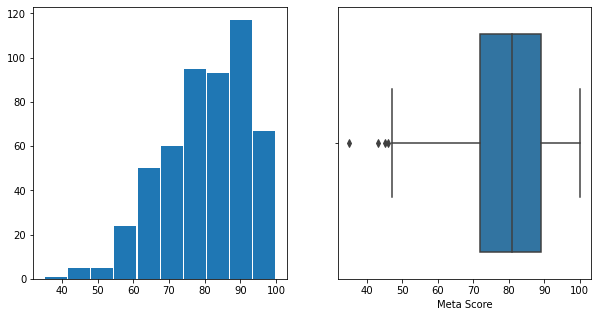

Years Gap
skewnesss : 0.96



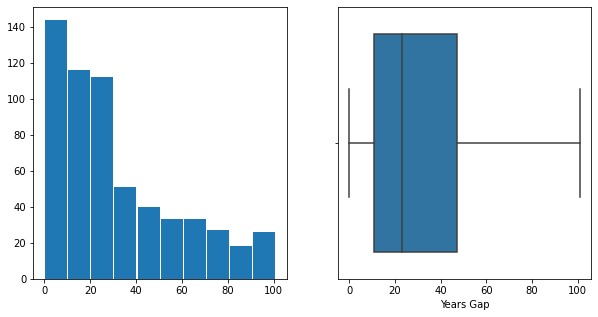

In [32]:
for i in Quantitative_data:
    print(i)
    print('skewnesss :',df[i].skew().round(2))
    print('')
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.hist(x=df[i],histtype='bar',rwidth=0.95)
    plt.subplot(1,2,2)
    sns.boxplot(x=df[i])
    plt.show()
    

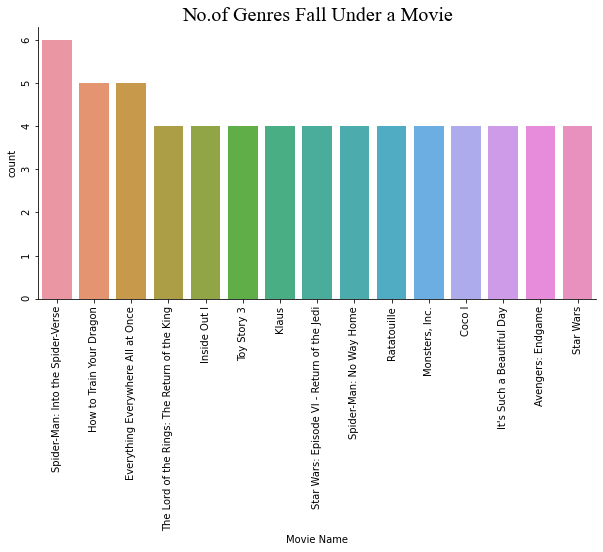

In [33]:
plt.figure(figsize=(10,5))

plt.title('No.of Genres Fall Under a Movie',fontdict={'family':'times new roman','size':20,'color':'black'})

sns.countplot(x=df['Movie Name'],order=df['Movie Name'].value_counts().head(15).index);

plt.tick_params(labelrotation =90)

sns.despine()

> Bi-Variance Analysis

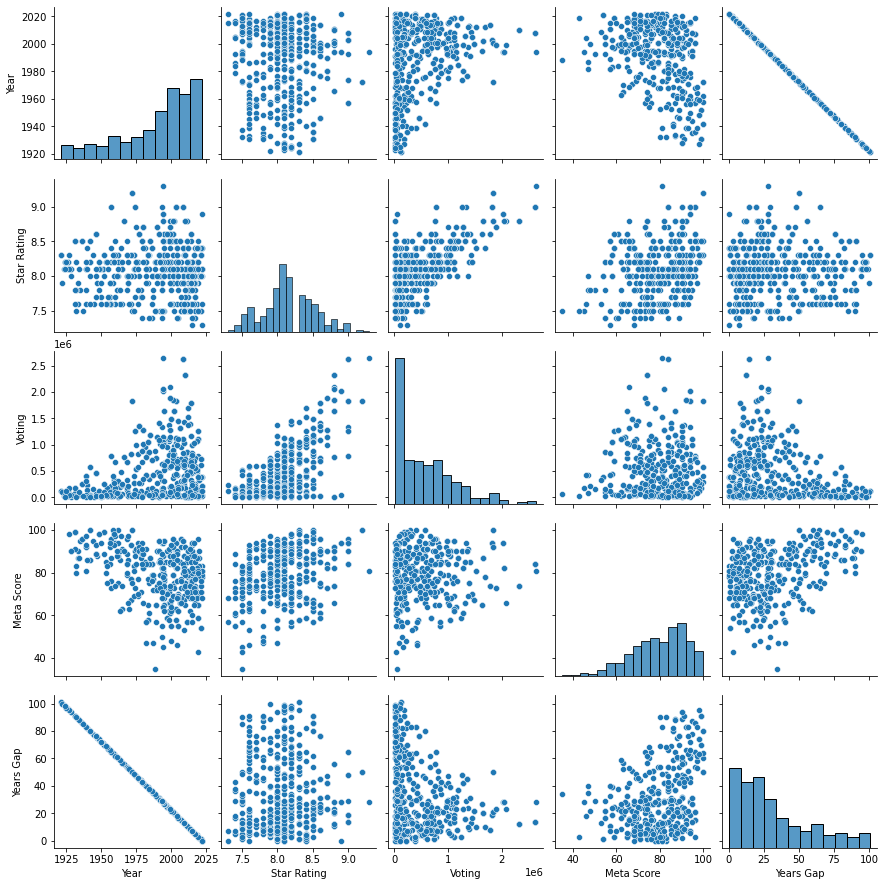

In [34]:
sns.pairplot(df);

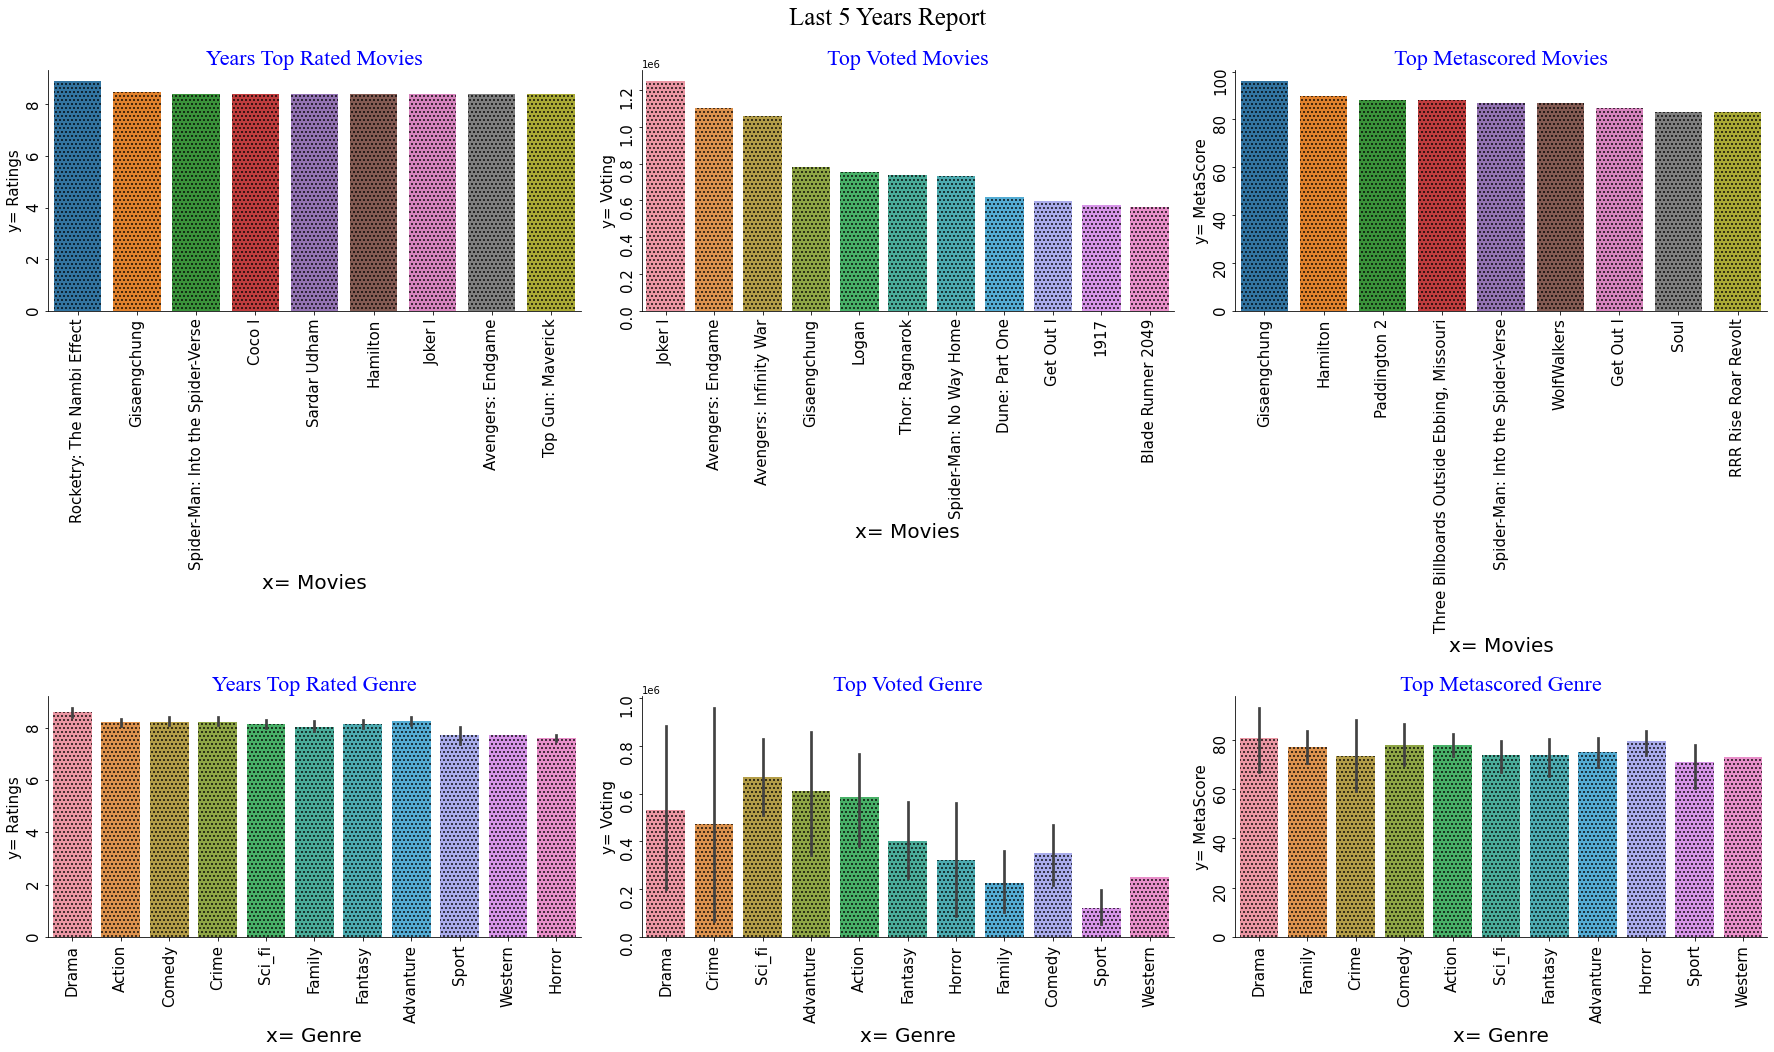

In [35]:
fig, axes=plt.subplots(2,3,figsize=(25,15))

plt.suptitle('Last 5 Years Report',fontdict={'family':'times new roman','color':'black'},fontsize=25)

axes[0,0].set_title('Years Top Rated Movies',fontdict={'family':'times new roman','size':22,'color':'blue'})
x1 = df[df['Years Gap'] <=5].sort_values('Star Rating',ascending=False,ignore_index=True)[['Movie Name','Star Rating']].head(15).drop_duplicates()
sns.barplot(ax=axes[0,0],x=x1['Movie Name'],y=x1['Star Rating'],hatch='...')
axes[0,0].tick_params(labelrotation=90,labelsize=15)
axes[0,0].set_xlabel('x= Movies',fontsize=20)
axes[0,0].set_ylabel('y= Ratings',fontsize=15)

axes[0,1].set_title('Top Voted Movies',fontdict={'family':'times new roman','size':22,'color':'blue'})
x2 = df[df['Years Gap'] <=5].sort_values('Voting',ascending=False,ignore_index=True)[['Movie Name','Voting']].head(22).drop_duplicates()
sns.barplot(ax=axes[0,1],x=x2['Movie Name'],y=x2['Voting'],hatch='...')
axes[0,1].tick_params(labelrotation=90,labelsize=15)
axes[0,1].set_xlabel('x= Movies',fontsize=20)
axes[0,1].set_ylabel('y= Voting',fontsize=15)


axes[0,2].set_title('Top Metascored Movies',fontdict={'family':'times new roman','size':22,'color':'blue'})
x3 = df[df['Years Gap'] <=5].sort_values('Meta Score',ascending=False,ignore_index=True)[['Movie Name','Meta Score']].head(17).drop_duplicates()
sns.barplot(ax=axes[0,2],x=x3['Movie Name'],y=x3['Meta Score'],hatch='...')
axes[0,2].tick_params(labelrotation=90,labelsize=15)
axes[0,2].set_xlabel('x= Movies',fontsize=20)
axes[0,2].set_ylabel('y= MetaScore',fontsize=15)


axes[1,0].set_title('Years Top Rated Genre',fontdict={'family':'times new roman','size':22,'color':'blue'})
x4 = df[df['Years Gap'] <=5].sort_values('Star Rating',ascending=False,ignore_index=True)[['Genre','Star Rating']].drop_duplicates()
sns.barplot(ax=axes[1,0],x=x4['Genre'],y=x4['Star Rating'],hatch='...')
axes[1,0].tick_params(labelrotation=90,labelsize=15)
axes[1,0].set_xlabel('x= Genre',fontsize=20)
axes[1,0].set_ylabel('y= Ratings',fontsize=15)


axes[1,1].set_title('Top Voted Genre',fontdict={'family':'times new roman','size':22,'color':'blue'})
x5 = df[df['Years Gap'] <=5].sort_values('Voting',ascending=False,ignore_index=True)[['Genre','Voting']].drop_duplicates()
sns.barplot(ax=axes[1,1],x=x5['Genre'],y=x5['Voting'],hatch='...')
axes[1,1].tick_params(labelrotation=90,labelsize=15)
axes[1,1].set_xlabel('x= Genre',fontsize=20)
axes[1,1].set_ylabel('y= Voting',fontsize=15)


axes[1,2].set_title('Top Metascored Genre',fontdict={'family':'times new roman','size':22,'color':'blue'})
x6 = df[df['Years Gap'] <=5].sort_values('Meta Score',ascending=False,ignore_index=True)[['Genre','Meta Score']].drop_duplicates()
sns.barplot(ax=axes[1,2],x=x6['Genre'],y=x6['Meta Score'],hatch='...')
axes[1,2].tick_params(labelrotation=90,labelsize=15)
axes[1,2].set_xlabel('x= Genre',fontsize=20)
axes[1,2].set_ylabel('y= MetaScore',fontsize=15)


sns.despine()
plt.tight_layout(pad=2)

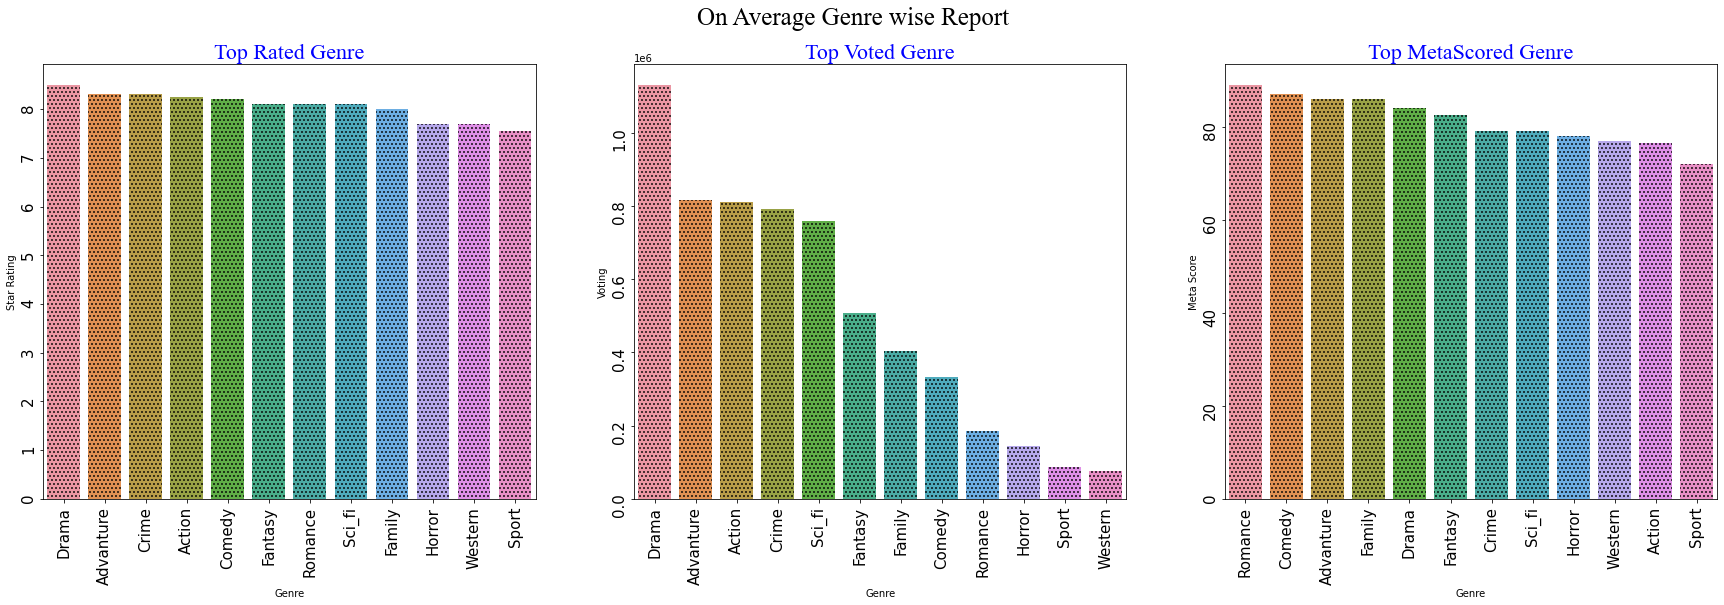

In [36]:
fig,axes=plt.subplots(1,3,figsize=(30,8))

plt.suptitle('On Average Genre wise Report',fontdict={'family':'times new roman','color':'black'},fontsize=25)

axes[0].set_title('Top Rated Genre',fontdict={'family':'times new roman','size':22,'color':'blue'})
y1 = pd.DataFrame(df.groupby('Genre')['Star Rating'].median().sort_values(ascending=False)).reset_index()
sns.barplot(ax=axes[0],x=y1['Genre'],y=y1['Star Rating'],hatch='...')
axes[0].tick_params(labelrotation=90,labelsize=15)


axes[1].set_title('Top Voted Genre',fontdict={'family':'times new roman','size':22,'color':'blue'})
y2 = pd.DataFrame(df.groupby('Genre')['Voting'].median().sort_values(ascending=False)).reset_index()
sns.barplot(ax=axes[1],x=y2['Genre'],y=y2['Voting'],hatch='...')
axes[1].tick_params(labelrotation=90,labelsize=15)

axes[2].set_title('Top MetaScored Genre',fontdict={'family':'times new roman','size':22,'color':'blue'})
y3 = pd.DataFrame(df.groupby('Genre')['Meta Score'].median().sort_values(ascending=False)).reset_index()
sns.barplot(ax=axes[2],x=y3['Genre'],y=y3['Meta Score'],hatch='...')
axes[2].tick_params(labelrotation=90,labelsize=15)



> Multivariate Analysis

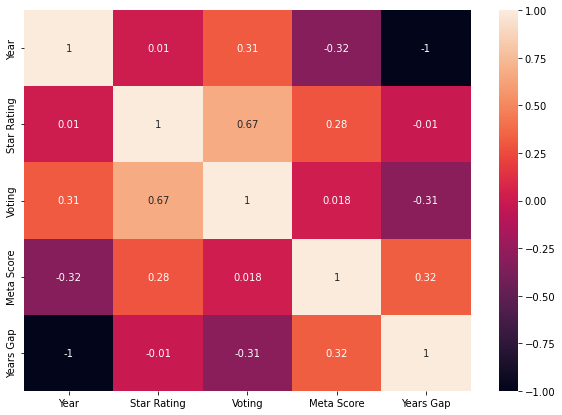

In [37]:
plt.figure(figsize=(10,7))

sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True);

## Case Study Points -

1. first of all, we have to know what this data set is, by the help of the user reviews, ratings, and Metascore we can understand which genre is running in the top market over the remaining genres. However here in the dataset if could you observe those, a movie with multiple genres like action, adventure, and crime.


2. After preprocessing (cleaning/data wrangling) step, the next outliers and skewness part in the univariance analysis, Voting column observations has more skewness and left skewed Distribution.


3. on average every movie in the data set has 2-4 genres but( Movie- Spider-Man: Into the Spider-Verse) has 6 genres.


4. If you see between year and voting are having a positive correlation. and between year and meta scores are having negative correlation, Between Rating and Voting are having positive correlation.


5. Coming to the Bi Variance Analysis, For the last 5 years 2022 (The movie - Rocketry The Nambi Effect, Drama Genre) has stood as the Highest rated movie. and  (Movie - Joker, Drama genre) has so many users giving ratings over the other movies.


5. Over the last 5 years Drama Genre movies are running effectively in the cinema market.


6. even though the On Average Drama genre has gotten the highest-rated movie and a huge number of people were giving their ratings.

### Conclusion - So many times we think only Action movies are getting rated well over the others however if we think nowadays so many ott platforms contain many web series that are drama genre. I mean here my point is before the web series episodes days in the Television serials were going on effectively those were Family Drama Genre. the same situation now in the ott platforms we can call modern serials. so the ott platforms are running significantly with the healthy market. 